# <u>***Air Quality Data EDA***</u>
----------------
**Author Name :** Muhammad Muneer Hussain \
**Git Hub :** [Git Hub link](https://github.com/Muhammad-Muneer-Hussain/Student-Performance-in-Exam-Analysis)\
**Linkedin :** [linkedin link](https://www.linkedin.com/in/muhammad-muneer-hussain-mmh85/)\
**Email :** [Gmail link](muhammadmuneerhussain85@gmail.com) 

----------
### Dataset Details
**DataSet :** [Link](https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india)\
**Content**\
\
**Columns Included:**

### ***Problem Statement***
Air pollution is one of the most pressing global environmental challenges, directly impacting human
health, ecosystems, and climate. Monitoring air quality helps policymakers and environmental
agencies make informed decisions to control emissions and protect public health. In this project, we
will explore global air quality datasets to identify pollution trends, seasonal variations, and
city/country comparisons.



In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# loading the dataset
df= pd.read_csv('city_day.csv')

In [51]:
df.sample(6)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28462,Visakhapatnam,2017-07-29,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN
16516,Hyderabad,2020-04-22,25.12,46.30,7.57,26.18,18.57,17.45,0.39,4.56,23.58,0.94,5.18,0.22,50.0,Good
24729,Patna,2017-10-13,71.12,NaN,10.84,31.69,25.66,NaN,0.08,12.06,33.81,0.01,0.16,0.05,NaN,NaN
14621,Hyderabad,2015-02-13,NaN,NaN,28.51,12.59,41.10,NaN,0.39,2.32,0.02,0.25,0.76,0.13,NaN,NaN
10488,Delhi,2015-09-17,104.85,250.21,23.06,60.96,73.86,48.13,1.40,11.68,85.86,4.48,13.25,3.17,285.0,Poor
26650,Talcher,2019-08-30,34.32,84.01,35.66,5.37,38.15,8.12,1.26,46.89,5.94,0.00,NaN,NaN,103.0,Moderate


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [53]:
df.isna().sum()*100 /len(df)

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

- **Filling the missing values**
- **On the basis of Cities**

In [54]:
df.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [55]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [56]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [57]:
cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 
        'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
#filling city wise
df[cols] = df.groupby("City")[cols].transform(lambda x: x.fillna(x.mean()))


#Fillna with overall mean (for cities jaha sab NaN tha)
df[cols] = df[cols].fillna(df[cols].mean())

In [58]:
df.isna().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [59]:
#fill Aqi_bucket value on the basis of cities

df["AQI_Bucket"] = df.groupby("City")["AQI_Bucket"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [60]:
df.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  29531 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


#### ***Now changing datatypes***

In [63]:
# Date column ko datetime me
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Numeric pollution columns to float 
numeric_cols = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", 
                "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene", "AQI"]

df[numeric_cols] = df[numeric_cols].astype(float)



In [67]:
df.dtypes

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
dtype: object

### Which cities have the highest average AQI (Air Quality Index)?

In [72]:
df.groupby('City')['AQI'].mean().sort_values(ascending=False)

City
Ahmedabad             452.122939
Delhi                 259.487744
Patna                 240.782042
Gurugram              225.123882
Lucknow               217.973059
Talcher               172.886819
Jorapokhar            159.251621
Brajrajnagar          150.280505
Kolkata               140.566313
Guwahati              140.111111
Jaipur                133.679159
Bhopal                132.827338
Amritsar              119.920959
Visakhapatnam         117.269855
Chennai               114.502654
Hyderabad             109.207447
Mumbai                105.352258
Kochi                 104.284810
Chandigarh             96.498328
Amaravati              95.299643
Bengaluru              94.318325
Ernakulam              92.359477
Thiruvananthapuram     75.878327
Coimbatore             73.023256
Shillong               53.795122
Aizawl                 34.765766
Name: AQI, dtype: float64

### How does AQI vary by month or season?

In [73]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.00,0.02,0.00,452.122939,Severe
1,Ahmedabad,2015-01-02,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,3.68,5.50,3.77,452.122939,Severe
2,Ahmedabad,2015-01-03,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,6.80,16.40,2.25,452.122939,Severe
3,Ahmedabad,2015-01-04,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,4.43,10.14,1.00,452.122939,Severe
4,Ahmedabad,2015-01-05,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,7.01,18.89,2.78,452.122939,Severe


In [75]:
df["Month"] = df["Date"].dt.month

In [77]:
df.groupby("Month")['AQI'].mean().sort_values(ascending=False)

Month
11    235.012827
1     225.546280
12    222.028720
2     201.256037
10    183.084023
3     167.686823
4     149.113975
5     144.272968
6     131.839786
9     127.530941
8     124.878914
7     124.426822
Name: AQI, dtype: float64

In [78]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8]:
        return "Monsoon"
    else:
        return "Post-Monsoon"

df["Season"] = df["Month"].apply(get_season)

In [79]:
df.groupby("Season")['AQI'].mean().sort_values(ascending=False)

Season
Winter          216.407893
Post-Monsoon    182.116485
Summer          153.635285
Monsoon         127.465132
Name: AQI, dtype: float64

### What pollutants are recorded, and what are their average levels?

In [80]:
df.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Season
0,Ahmedabad,2015-01-01,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.00,0.02,0.00,452.122939,Severe,1,Winter
1,Ahmedabad,2015-01-02,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,3.68,5.50,3.77,452.122939,Severe,1,Winter


In [81]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Month',
       'Season'],
      dtype='object')

In [84]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
overall_avg = df[pollutants].mean()
print("OverAll Average")
print(overall_avg)

OverAll Average
PM2.5       66.234841
PM10       116.228087
NO          18.226745
NO2         28.641768
NOx         32.855058
NH3         23.024137
CO           2.602122
SO2         15.639939
O3          34.329319
Benzene      3.263615
Toluene      8.276830
Xylene       3.114350
AQI        169.486556
dtype: float64


In [87]:
print('CITY WISE AVERAGE OF POLLUTANTS \n \n')
df.groupby('City')[pollutants].mean()


CITY WISE AVERAGE OF POLLUTANTS 
 



,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
City,,,,,,,,,,,,,
Ahmedabad,67.854497,114.584029,22.428021,59.025496,47.366898,23.024137,22.193407,55.253733,39.155408,5.413807,27.740524,4.248341,452.122939
Aizawl,17.130000,23.352857,9.408053,0.388496,12.610354,22.308938,0.283628,7.378053,3.707692,9.809286,10.247347,3.114350,34.765766
Amaravati,37.773217,76.362020,4.436071,22.175748,15.380413,11.988493,0.627904,14.258341,38.115100,0.546416,1.877637,0.981613,95.299643
Amritsar,55.468335,115.202599,18.727926,18.522116,35.648294,14.375556,0.551301,8.148917,22.416148,4.182290,3.036264,7.356062,119.920959
Bengaluru,35.819828,83.243287,9.409136,27.995042,19.717092,21.977176,1.838634,5.519021,32.868086,3.222553,4.753194,3.114350,94.318325
Bhopal,50.059571,119.324321,7.037214,31.345321,22.428964,19.072071,0.880393,13.064821,59.851036,3.263615,8.276830,3.114350,132.827338
Brajrajnagar,64.057610,124.217373,17.301813,16.520540,24.542647,36.655871,1.798274,9.783221,16.599660,4.842562,8.276830,3.114350,150.280505
Chandigarh,41.130242,85.656546,10.501433,11.611067,15.058667,30.777143,0.631349,10.159375,20.047204,5.065724,1.398750,2.623059,96.498328
Chennai,50.425613,62.834404,9.190563,16.857623,17.667942,63.452612,1.067349,7.877182,32.443816,1.709205,2.595666,3.114350,114.502654


### 4. Which city has the cleanest air on average?

In [109]:
df.groupby('City')['AQI'].mean().idxmin()

'Aizawl'

### Are there any missing data patterns in the dataset?

In [110]:
# yes
# we already deal with missing values in the startign

### Which cities consistently exceed safe pollution limits? 

This means the maximum safe concentration of a pollutant, usually defined by WHO or a government agency.

WHO Air Quality Guidelines (2021 update):

PM2.5 → 15 µg/m³ (annual mean), 25 µg/m³ (24-hour mean)

PM10 → 45 µg/m³ (annual mean), 75 µg/m³ (24-hour mean)

NO2 → 25 µg/m³ (annual mean), 200 µg/m³ (1-hour mean)

SO2 → 40 µg/m³ (24-hour mean)

O3 → 100 µg/m³ (8-hour mean)

In [112]:
limits = {
    'PM2.5': 15,
    'PM10': 45, 
    'NO2': 25,  
    'SO2': 40,     
    'O3': 100      
}

# City-wise averages
city_avg = df.groupby('City')[list(limits.keys())].mean()

exceeding = city_avg > pd.Series(limits)
print(exceeding)


                    PM2.5   PM10    NO2    SO2     O3
City                                                 
Ahmedabad            True   True   True   True  False
Aizawl               True  False  False  False  False
Amaravati            True   True  False  False  False
Amritsar             True   True  False  False  False
Bengaluru            True   True   True  False  False
Bhopal               True   True   True  False  False
Brajrajnagar         True   True  False  False  False
Chandigarh           True   True  False  False  False
Chennai              True   True  False  False  False
Coimbatore           True  False   True  False  False
Delhi                True   True   True  False  False
Ernakulam            True   True  False  False  False
Gurugram             True   True  False  False  False
Guwahati             True   True  False  False  False
Hyderabad            True   True   True  False  False
Jaipur               True   True   True  False  False
Jorapokhar           True   

### How do pollution levels vary between weekdays and weekends?

In [117]:
df['Day Type'] = df.Date.dt.dayofweek.apply(lambda x : 'Week' if x<5 else 'Weekend')

In [118]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Season,Day Type
0,Ahmedabad,2015-01-01,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.00,0.02,0.00,452.122939,Severe,1,Winter,Week
1,Ahmedabad,2015-01-02,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,3.68,5.50,3.77,452.122939,Severe,1,Winter,Week
2,Ahmedabad,2015-01-03,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,6.80,16.40,2.25,452.122939,Severe,1,Winter,Weekend
3,Ahmedabad,2015-01-04,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,4.43,10.14,1.00,452.122939,Severe,1,Winter,Weekend
4,Ahmedabad,2015-01-05,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,7.01,18.89,2.78,452.122939,Severe,1,Winter,Week


In [124]:
df.groupby('Day Type')['AQI'].mean().sort_values()

Day Type
Weekend    167.994596
Week       170.082902
Name: AQI, dtype: float64

# ***Visualization:***

### Bar chart of Top 10 most polluted cities by AQI.

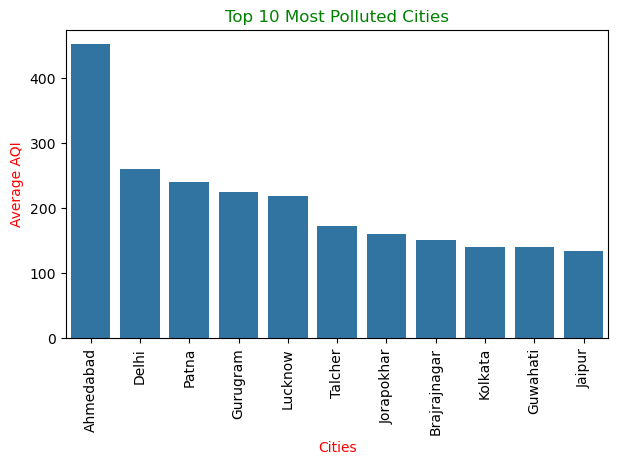

In [142]:
A =df.groupby('City')['AQI'].mean().sort_values(ascending=False)[:11]
plt.figure(figsize=(7,4))
sns.barplot(A)
plt.title('Top 10 Most Polluted Cities',c='green')
plt.xlabel('Cities',c='red')
plt.ylabel('Average AQI',c='red')
plt.xticks(rotation=90)
plt.show()

### Line plot showing monthly AQI trends for selected cities.

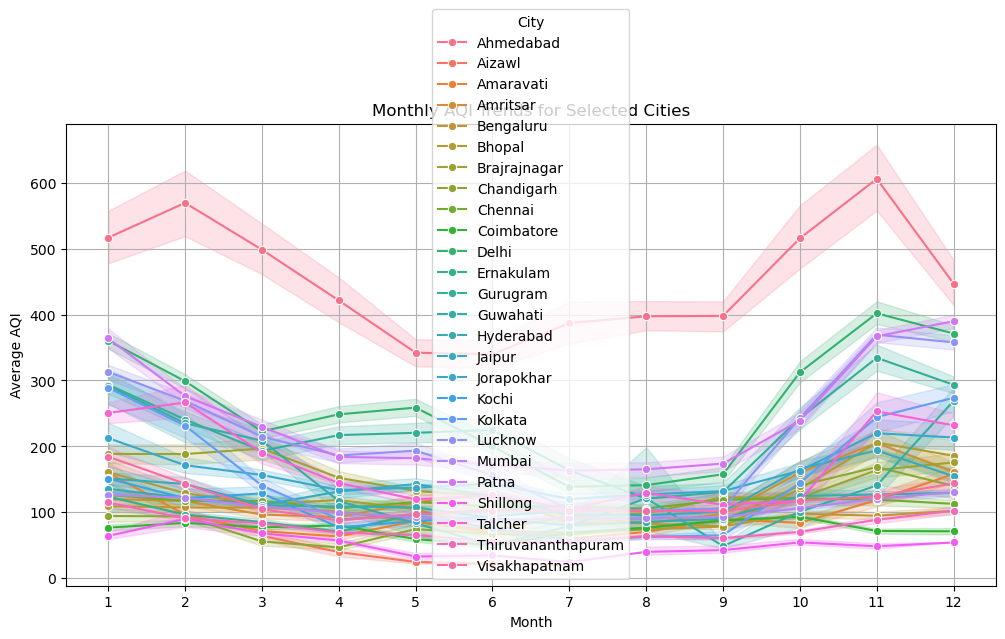

In [139]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Month', y='AQI', hue='City', marker='o')
plt.title('Monthly AQI Trends for Selected Cities')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(range(1,13))  # 1=Jan, 12=Dec
plt.grid(True)
plt.show()


### Heatmap showing correlation between pollutants (PM2.5, PM10, NO2, SO2, O3, CO). 

In [148]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Month',
       'Season', 'Day Type'],
      dtype='object')

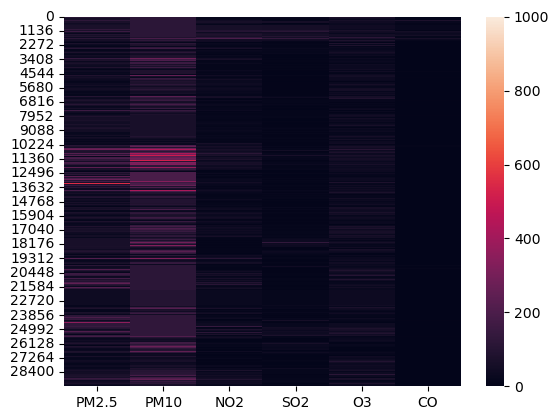

In [151]:
c = df[['PM2.5','PM10','NO2','SO2','O3','CO']]
sns.heatmap(data= c)
plt.show()

### Seasonal comparison plot of average AQI levels

In [158]:
seasonal_aqi = df.groupby(['Season', 'City'])['AQI'].mean().reset_index()

seasonal_aqi

,Season,City,AQI
0,Monsoon,Ahmedabad,373.028977
1,Monsoon,Aizawl,21.282767
2,Monsoon,Amaravati,66.035782
3,Monsoon,Amritsar,100.510191
4,Monsoon,Bengaluru,82.242552
...,...,...,...
95,Winter,Patna,345.299977
96,Winter,Shillong,68.582257
97,Winter,Talcher,250.405967
98,Winter,Thiruvananthapuram,102.684102


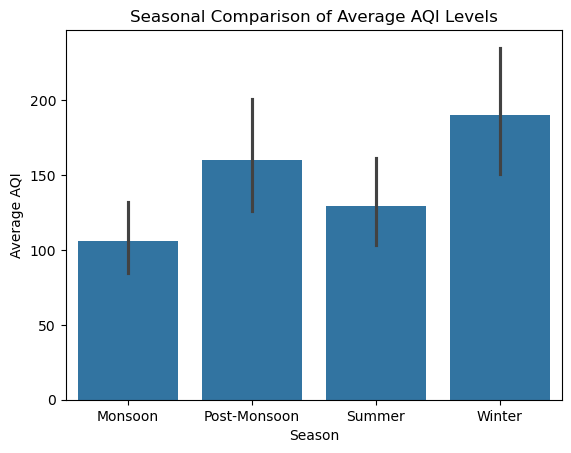

In [162]:

sns.barplot(data=seasonal_aqi, x='Season', y='AQI')
plt.title('Seasonal Comparison of Average AQI Levels')
plt.ylabel('Average AQI')
plt.xlabel('Season')
plt.show()


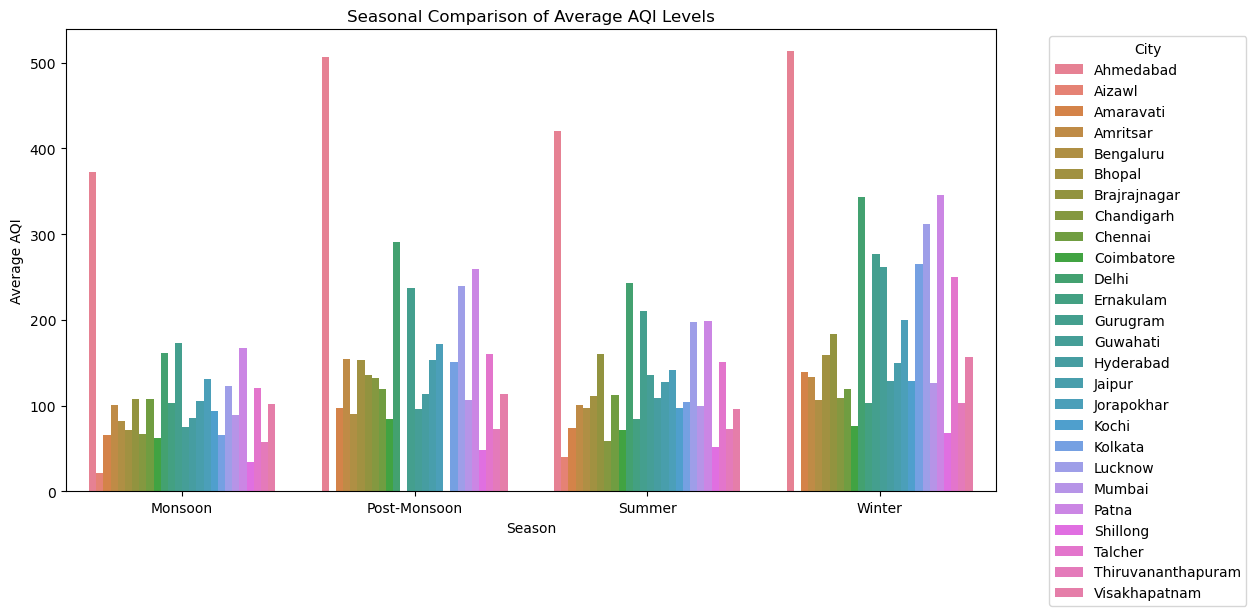

In [163]:
plt.figure(figsize=(12,6))
sns.barplot(data=seasonal_aqi, x='Season', y='AQI', hue='City')
plt.title('Seasonal Comparison of Average AQI Levels')
plt.ylabel('Average AQI')
plt.xlabel('Season')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Stacked bar chart of pollutant contributions in different cities.

In [164]:
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

# Calculate city-wise averages
city_pollution = df.groupby('City')[pollutants].mean()

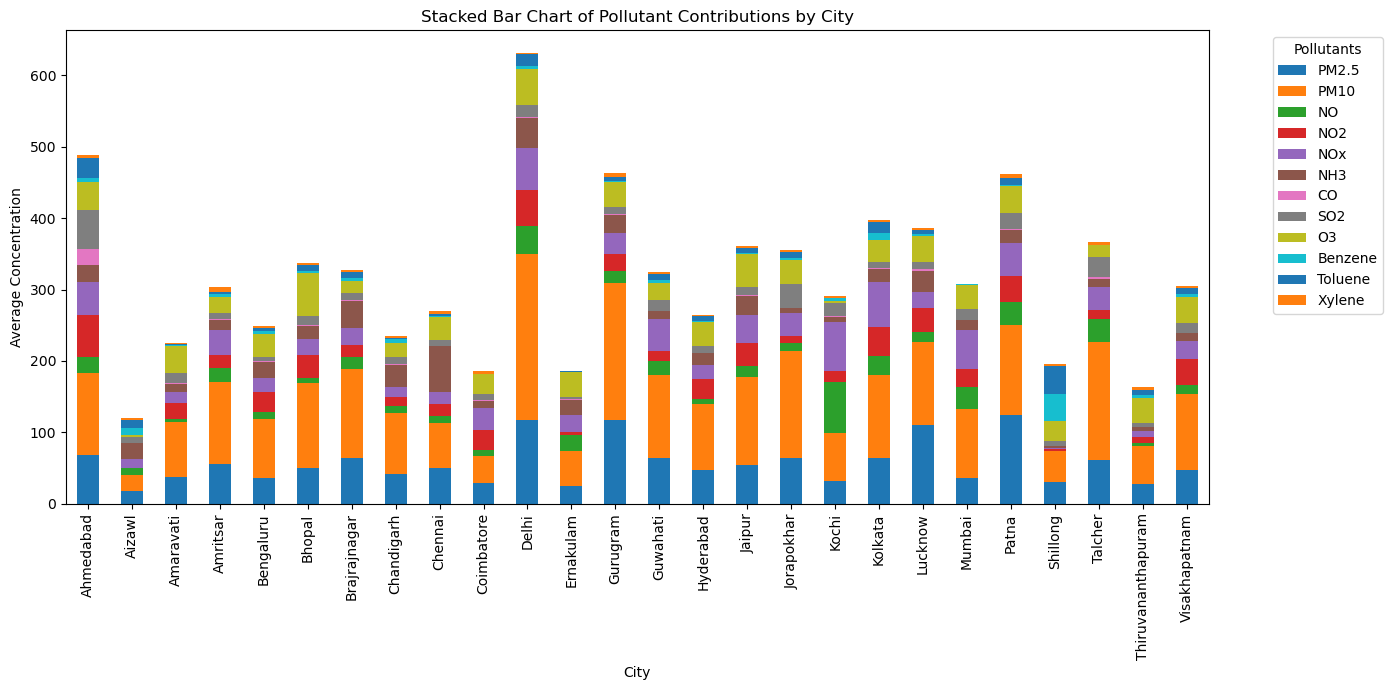

In [165]:
# Plot stacked bar chart
city_pollution.plot(kind='bar', stacked=True, figsize=(14,7))

plt.title("Stacked Bar Chart of Pollutant Contributions by City")
plt.xlabel("City")
plt.ylabel("Average Concentration")
plt.legend(title="Pollutants", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### city and month wise AQI distribution

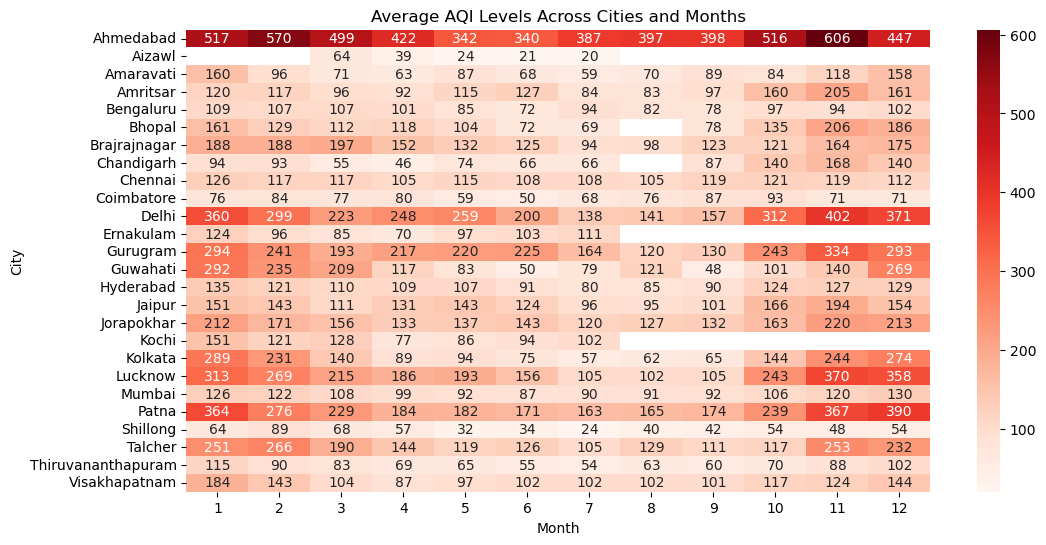

In [173]:
pivot_data = df.pivot_table(values="AQI", index="City", columns="Month", aggfunc="mean")

plt.figure(figsize=(12,6))
sns.heatmap(pivot_data, cmap="Reds", annot=True, fmt=".0f")
plt.title("Average AQI Levels Across Cities and Months")
plt.xlabel("Month")
plt.ylabel("City")
plt.show()


### Boxplot comparing AQI across major cities.

In [171]:
# Pick major cities
major_cities = ['Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Bengaluru']

# Filter dataset
df_major = df[df['City'].isin(major_cities)]


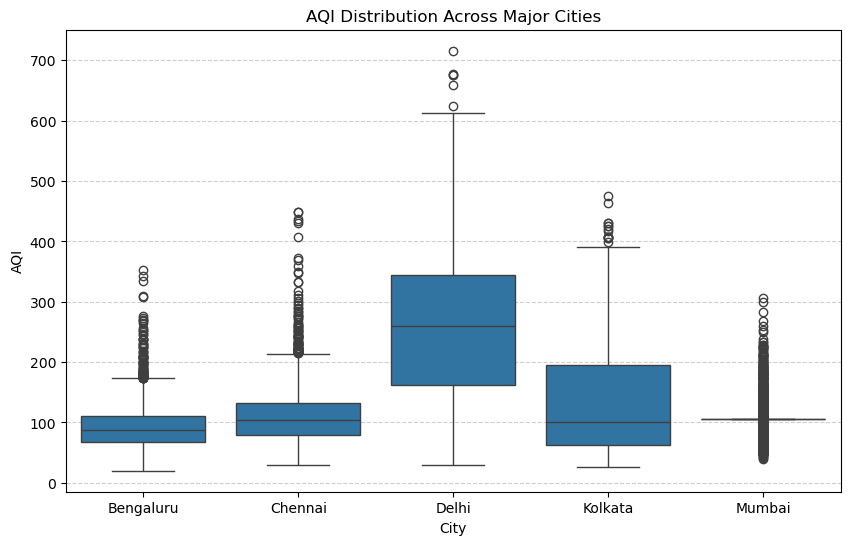

In [172]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_major, x='City', y='AQI')

plt.title('AQI Distribution Across Major Cities')
plt.ylabel('AQI')
plt.xlabel('City')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()
